# Project 1: SAT & ACT Analysis

## Problem Statement

Using ACT and SAT dataset from 2017 and 2018, provide recommendations on which state to best invest on to improve SAT participation rates.

## Executive Summary

There's a lot of data and visualizations here. The aim of this project is to leverage a data-driven approach to ultimately come up with recommendations via [Conclusions and Recommendations](#Conclusions-and-Recommendations) to identify which state College Board should focus their money and attention on in order to improve SAT participation rates.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
df_sat2017 = pd.read_csv("../data/sat_2017.csv")
df_act2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:  
  
ACT has 1 more observation versus SAT. Total of 103 observations were recorded across SAT and ACT scores for 2017. Scoring weights are also different across SAT and ACT. It's noted that the overall score obtained for SAT is the sum of the respective scores whilst the overall score for ACT is the average across all categories. SAT comprise of 2 components making up the total score whereas ACT's composite score is the average across 4 subjects.

#### 4a. Does the data look complete? 

Answer:  
  
No missing values found, but a data dictionary could be more useful to further define and explain participation rate.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
  
Issues include:  
1. Row 52 of ACT composite score has an 'x' in it (20.2x)
2. Composite column is object type
3. "National" is included in ACT data though its not a state
4. "Maryland" has issues with Math SAT score and Science ACT score

Minimum possible value for SAT: 400  
Maximum possible value for SAT: 1600  
  
Minimum possible value for ACT: 1  
Maximum possible value for ACT: 36  

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code

df_act2017.loc[df_act2017['State'] == 'Wyoming', 'Composite'] = 20.2 # Addresses issue #1 above
df_act2017["Composite"] = df_act2017["Composite"].astype(float) # Addresses issue #2 above
df_sat2017.loc[df_sat2017['State'] == 'Maryland', 'Math'] = 524 # Addresses issue #4 above
df_act2017.loc[df_act2017['State'] == 'Maryland', 'Science'] = 23.2 # Addresses issue #4 above

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
df_sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
df_act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Row 52 of ACT composite score has an 'x' in it (20.2x). Also composite column is object type, can be converted to float after this issue is fixed.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
def convert_to_numeric(value):
    value = value.replace("%", "")
    value = float(value)
    return value

df_sat2017['Participation'] = df_sat2017['Participation'].apply(convert_to_numeric)

In [9]:
df_act2017['Participation'] = df_act2017['Participation'].apply(convert_to_numeric)

- Fix any individual values preventing other columns from being the appropriate type.

In [10]:
df_act2017.loc[df_act2017['State'] == 'Wyoming', 'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
print(df_sat2017.columns)
print(df_act2017.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')


- Display the data types again to confirm they are correct.

In [12]:
print(df_sat2017.dtypes)
print(df_act2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [13]:
for col in df_sat2017.columns:
    if col != "State":
        df_sat2017.rename(columns={col: (col + "_sat17").lower().replace(" ", "").replace("-","")} , inplace=True)

df_sat2017.rename(columns={
    "evidencebasedreadingandwriting_sat17": "readwrite_sat17",
    "State": "state"                      
    }, inplace=True) 


In [14]:
for col in df_act2017.columns:
    if col != "State":
        df_act2017.rename(columns={col: (col + "_act17").lower()} , inplace=True)
        
df_act2017.rename(columns={"State": "state"}, inplace=True)

In [15]:
df_act2017.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [16]:
df_sat2017.head()

,state,participation_sat17,readwrite_sat17,math_sat17,total_sat17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


##### Data dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT/SCT|The state of the country| 
|**participation**|*float*|ACT/SCT|The percentage participation of the state for the examination| 
|**english**|*float*|ACT|The average English score for the state| 
|**math**|*float*|ACT/SCT|The average Math score for the state| 
|**reading**|*float*|ACT|The average Reading score for the state| 
|**science**|*float*|ACT|The average Science score for the state| 
|**composite**|*float*|ACT|The average composite score for the state| 
|**readwrite**|*float*|SAT|The average Reading and Writing score for the state|  
|**total**|*float*|SAT|The average total score for the state| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
df_act2017.drop([0], inplace=True) # Dropped row for National level data

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
df_merged = pd.merge(df_act2017, df_sat2017)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
df_merged.to_csv('..\data\combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [20]:
df_sat2018 = pd.read_csv("../data/sat_2018.csv")
df_act2018 = pd.read_csv("../data/act_2018_updated.csv")

In [21]:
# Standardizing columns to match dataframe of 2017

for col in df_sat2018.columns:
    if col != "State":
        df_sat2018.rename(columns={col: (col + "_sat18").lower().replace(" ", "")} , inplace=True)

df_sat2018.rename(columns={
    "evidence-basedreadingandwriting_sat18": "readwrite_sat18",
    "State": "state"                      
    }, inplace=True) 

for col in df_act2018.columns:
    if col != "State":
        df_act2018.rename(columns={col: (col + "_act18").lower().replace(" ", "").replace("average","").replace("score","")} , inplace=True)

df_act2018.rename(columns={
    "percentageofstudentstested_act18": "participation_act18",
    "State": "state"                      
    }, inplace=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [22]:
df_act2018["participation_act18"] = df_act2018["participation_act18"].astype(float)
df_sat2018['participation_sat18'] = df_sat2018['participation_sat18'].apply(convert_to_numeric)

In [23]:
df_merged2018 = pd.merge(df_act2018, df_sat2018)
df_final = pd.merge(df_merged, df_merged2018)
df_final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [24]:
df_final.describe()

,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,readwrite_sat17,math_sat17,total_sat17,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18,participation_sat18,readwrite_sat18,math_sat18,total_sat18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [25]:
def standard_deviation(list_of_numbers):
    deviations = []
    for number in list_of_numbers:
        deviations.append((number - np.mean(list_of_numbers))**2)
    result = (sum(deviations)/len(list_of_numbers))**0.5
    return result

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [26]:
sd = {col.name:standard_deviation(col) for col in [df_final[i] for i in df_final.columns if df_final[i].dtype=='float64']} 

In [27]:
sd

{'participation_act17': 31.824175751231806,
 'english_act17': 2.3304876369363363,
 'math_act17': 1.9624620273436781,
 'reading_act17': 2.0469029314842646,
 'science_act17': 1.7222161451443676,
 'composite_act17': 2.000786081581989,
 'participation_sat17': 34.92907076664508,
 'participation_act18': 33.745194881997506,
 'composite_act18': 2.0855261815801147,
 'english_act18': 2.4222536143202795,
 'math_act18': 2.015707255555717,
 'reading_act18': 2.145891884510421,
 'science_act18': 1.8516885484833543,
 'participation_sat18': 36.946619223539415}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Does not match up with pandas `describe` method but matches with numpy's `std` method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

###### Highest Participation Rate
2017 SAT: District of Columbia, Michigan, Connecticut, Delaware, New Hampshire  
2018 SAT: Colorado, Connecticut, Delaware, Michigan, Idaho  
2017 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee  
2018 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee  
  
###### Lowest Participation Rate  
2017 SAT: North Dakota, Mississippi, Iowa, Missouri, Utah  
2018 SAT: North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin  
2017 ACT: Maine, New Hampshire, Delaware, Rhode Island, Pennsylvania  
2018 ACT: Maine, Rhode Island, New Hampshire, Delaware, North Carolina  
  
###### Highest Total/Composite Rate  
2017 SAT: Minnesota, Wisconsin, Iowa, Missouri, Kansas  
2018 SAT: Minnesota, Wisconsin, North Dakota, Iowa, Kansas  
2017 ACT: New Hampshire, Massachusetts, Connecticut, Maine, District of Columbia  
2018 ACT: Connecticut, Massachusetts, New Hampshire, New York, Michigan  
  
###### Lowest Total/Composite Rate  
2017 SAT: District of Columbia, Delaware, Idaho, Michigan, Maine  
2018 SAT: District of Columbia, Delaware, West Virginia, Idaho, Michigan  
2017 ACT: Nevada, Mississippi, South Carolina, Hawaii, North Carolina  
2018 ACT: Nevada, South Carolina, Mississippi, Hawaii, Alabama  
  
###### Above 50% participation on both tests either year  
Florida, Georgia, Hawaii, North Carolina, South Carolina  
  
###### Do any states with 100% participation on a given test have a rate change year-to-year?  
Colorado, Minnesota  

##### Finding 1
District of Columbia, Connecticut and New Hampshire have 100% participation rates for ACT in 2017 but yet these states also rank top 5 for SAT composite scores.  

##### Finding 2
Delaware and Idaho have high participation rates for SAT in 2018/2017 but yet they are both in bottom 5 in terms of scores.  
##### Finding 3
Colorado and Illinois had massive drops in participation rates for ACT and big increments in SAT from 2017 to 2018.  
  
##### Finding 4  
Oregon and Alaska had <50% participation rates in either years for both SAT and ACT.  

In [28]:
#Do any states with 100% participation on a given test have a rate change year-to-year?

df_final.loc[df_final['participation_act17'] == 100].loc[df_final['participation_act18'] != 100]

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,readwrite_sat17,math_sat17,...,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18,participation_sat18,readwrite_sat18,math_sat18,total_sat18
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,...,30.0,23.9,23.9,23.2,24.4,23.5,100.0,519,506,1025
23,Minnesota,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644,651,...,99.0,21.3,20.2,21.4,21.7,21.4,4.0,643,655,1298


In [29]:
#Above 50% participation on both tests either year

df_final[['state', 'participation_sat17', 'participation_act17']] \
[(df_final['participation_sat17'] > 50) & (df_final['participation_act17'] > 50)]

,state,participation_sat17,participation_act17
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [30]:
df_final[['state', 'participation_sat18', 'participation_act18']] \
[(df_final['participation_sat18'] > 50) & (df_final['participation_act18'] > 50)]

,state,participation_sat18,participation_act18
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


In [31]:
#Participation rate ACT 2017 (Highest)
df_final[['state', 'participation_act17']].sort_values("participation_act17", ascending=False).head()

,state,participation_act17
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [32]:
#Participation rate ACT 2017 (Lowest)
df_final[['state', 'participation_act17']].sort_values("participation_act17", ascending=False).tail()

,state,participation_act17
38,Pennsylvania,23.0
39,Rhode Island,21.0
7,Delaware,18.0
29,New Hampshire,18.0
19,Maine,8.0


In [33]:
#Participation rate SAT 2017 (Highest)
df_final[['state', 'participation_sat17']].sort_values("participation_sat17", ascending=False).head()

,state,participation_sat17
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


In [34]:
#Participation rate SAT 2017 (Lowest)
df_final[['state', 'participation_sat17']].sort_values("participation_sat17", ascending=False).tail()

,state,participation_sat17
3,Arkansas,3.0
50,Wyoming,3.0
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0


In [35]:
#Participation rate ACT 2018 (Highest)
df_final[['state', 'participation_act18']].sort_values("participation_act18", ascending=False).head()

,state,participation_act18
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [36]:
#Participation rate ACT 2018 (Lowest)
df_final[['state', 'participation_act18']].sort_values("participation_act18", ascending=False).tail()

,state,participation_act18
38,Pennsylvania,20.0
7,Delaware,17.0
29,New Hampshire,16.0
39,Rhode Island,15.0
19,Maine,7.0


In [37]:
#Participation rate SAT 2018 (Highest)
df_final[['state', 'participation_sat18']].sort_values("participation_sat18", ascending=False).head()

,state,participation_sat18
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0


In [38]:
#Participation rate SAT 2018 (Lowest)
df_final[['state', 'participation_sat18']].sort_values("participation_sat18", ascending=False).tail()

,state,participation_sat18
24,Mississippi,3.0
15,Iowa,3.0
49,Wisconsin,3.0
50,Wyoming,3.0
34,North Dakota,2.0


In [39]:
#Composite scores ACT 2017 (Highest)
df_final[['state', 'composite_act17']].sort_values("composite_act17", ascending=False).head()

,state,composite_act17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [40]:
#Composite scores ACT 2017 (Lowest)
df_final[['state', 'composite_act17']].sort_values("composite_act17", ascending=False).tail()

,state,composite_act17
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


In [41]:
#Composite scores ACT 2018 (Highest)
df_final[['state', 'composite_act18']].sort_values("composite_act18", ascending=False).head()

,state,composite_act18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [42]:
#Composite scores ACT 2018 (Lowest)
df_final[['state', 'composite_act18']].sort_values("composite_act18", ascending=False).tail()

,state,composite_act18
0,Alabama,19.1
11,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


In [43]:
#Total scores SAT 2017 (Highest)
df_final[['state', 'total_sat17']].sort_values("total_sat17", ascending=False).head()

,state,total_sat17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [44]:
#Total scores SAT 2017 (Lowest)
df_final[['state', 'total_sat17']].sort_values("total_sat17", ascending=False).tail()

,state,total_sat17
19,Maine,1012
12,Idaho,1005
22,Michigan,1005
7,Delaware,996
8,District of Columbia,950


In [45]:
#Total scores SAT 2018 (Highest)
df_final[['state', 'total_sat18']].sort_values("total_sat18", ascending=False).head()

,state,total_sat18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [46]:
#Total scores SAT 2018 (Lowest)
df_final[['state', 'total_sat18']].sort_values("total_sat18", ascending=False).tail()

,state,total_sat18
11,Hawaii,1010
12,Idaho,1001
48,West Virginia,999
7,Delaware,998
8,District of Columbia,977


#### Finding 1
District of Columbia, Connecticut and New Hampshire have 100% participation rates for ACT in 2017 but yet these states also rank top 5 for SAT composite scores.

In [47]:
df_final[['state', 'participation_act17', 'composite_act17']].sort_values("participation_act17", ascending=False).head()

,state,participation_act17,composite_act17
0,Alabama,100.0,19.2
17,Kentucky,100.0,20.0
49,Wisconsin,100.0,20.5
44,Utah,100.0,20.3
42,Tennessee,100.0,19.8


#### Finding 2
Delaware and Idaho have high participation rates for SAT in 2018/2017 but yet they are both in bottom 5 in terms of scores.

In [48]:
# Below shows bottom 5 states for SAT scores in 2018
df_final[['state', 'total_sat18', 'participation_sat18']].sort_values("total_sat18", ascending=False).tail()

,state,total_sat18,participation_sat18
11,Hawaii,1010,56.0
12,Idaho,1001,100.0
48,West Virginia,999,28.0
7,Delaware,998,100.0
8,District of Columbia,977,92.0


In [49]:
# Below shows bottom 5 states for SAT scores in 2017
df_final[['state', 'total_sat17', 'participation_sat17']].sort_values("total_sat17", ascending=False).tail()

,state,total_sat17,participation_sat17
19,Maine,1012,95.0
12,Idaho,1005,93.0
22,Michigan,1005,100.0
7,Delaware,996,100.0
8,District of Columbia,950,100.0


#### Finding 3
Colorado and Illinois had massive drops in participation rates for ACT and big increments in SAT from 2017 to 2018.

In [50]:
# This code is to determine the total change in participation rates across both SAT and ACT

df_final["ACT_diff"] = abs(df_final['participation_act17'] - df_final['participation_act18'])
df_final["SAT_diff"] = abs(df_final['participation_sat17'] - df_final['participation_sat18'])
df_final["sum_diff"] = df_final["ACT_diff"] + df_final["SAT_diff"]
df_final[['state', 'sum_diff']].sort_values(by='sum_diff', ascending=False).head()

,state,sum_diff
5,Colorado,159.0
13,Illinois,140.0
1,Alaska,37.0
9,Florida,34.0
39,Rhode Island,32.0


In [51]:
# Deeper look into Colorado and Illinois

df_final[['state', 'participation_act17', 'participation_act18', 'participation_sat17', 'participation_sat18']]\
[(df_final['state'] == 'Colorado') | (df_final['state'] == 'Illinois')]

,state,participation_act17,participation_act18,participation_sat17,participation_sat18
5,Colorado,100.0,30.0,11.0,100.0
13,Illinois,93.0,43.0,9.0,99.0


#### Finding 4
Oregon and Alaska had <50% participation rates in either years for both SAT and ACT.

In [52]:
df_final[['state', 'participation_sat17', 'participation_act17']] \
[(df_final['participation_sat17'] <= 50) & (df_final['participation_act17'] <= 50)]

,state,participation_sat17,participation_act17
37,Oregon,43.0,40.0


In [53]:
df_final[['state', 'participation_sat18', 'participation_act18']] \
[(df_final['participation_sat18'] <= 50) & (df_final['participation_act18'] <= 50)]

,state,participation_sat18,participation_act18
1,Alaska,43.0,33.0
37,Oregon,48.0,42.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

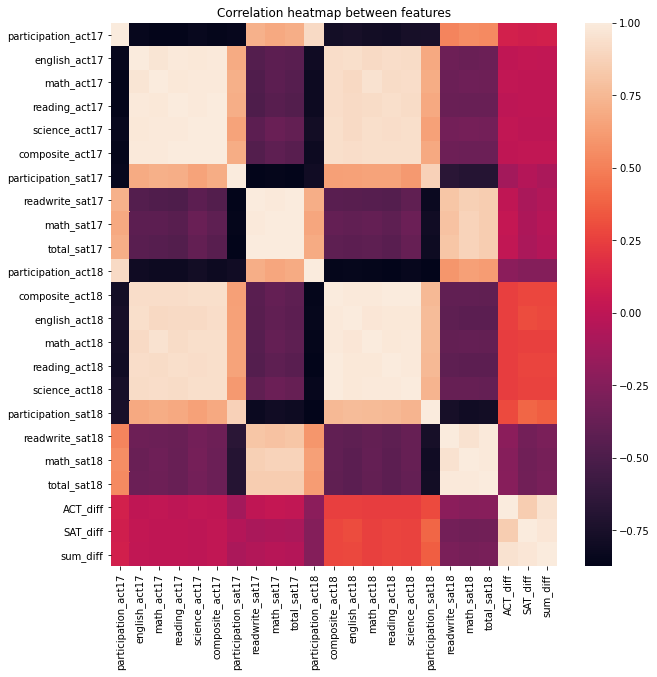

In [54]:
plt.figure(figsize=(10,10))

sns.heatmap(df_final.corr()).set_title("Correlation heatmap between features");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [55]:
# def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].hist(dataframe[column]) # feel free to add more settings
        
#         # Set titles, labels, etc here for each subplot

In [56]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,12))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        if "act" in column:
            color = 'slateblue'
        else:
            color = 'salmon'
        sns.histplot(dataframe[column],bins =20 ,ax = ax[i], color=color, kde=True)
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

Participation rates


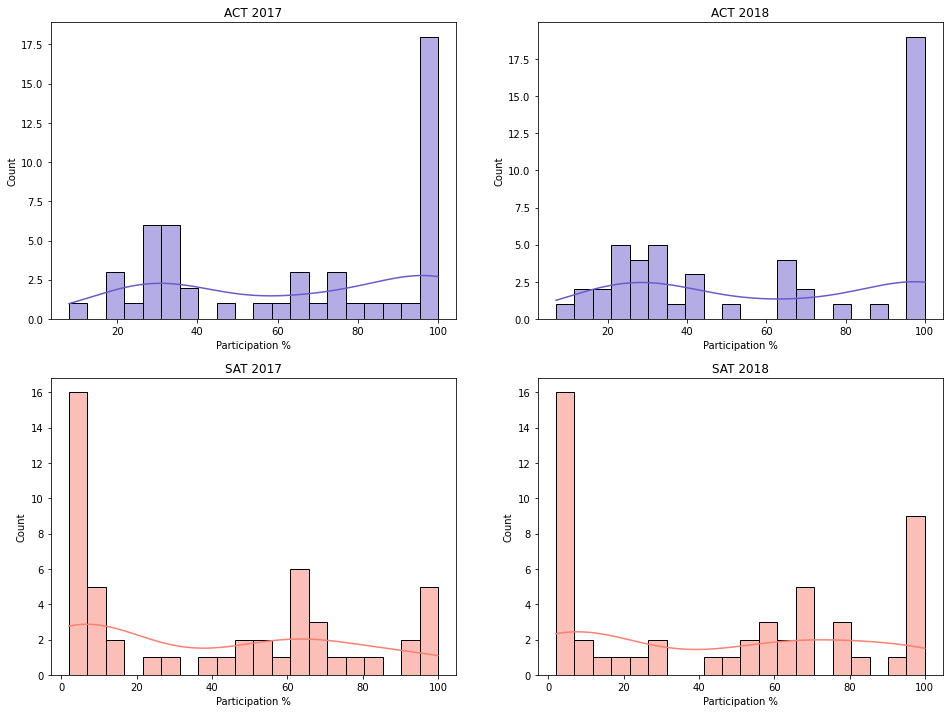

In [57]:
subplot_histograms(
    df_final,
    ['participation_act17', 'participation_act18', 'participation_sat17', 'participation_sat18'],
    ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018'],
    ['Participation %', 'Participation %', 'Participation %', 'Participation %'])

print('Participation rates')

Plots resemble a bimodal distribution where there are double peaks. ACT seem to have a higher concentration for full participation whereas SAT seem to have a higher concentration for zero participation.

Math scores


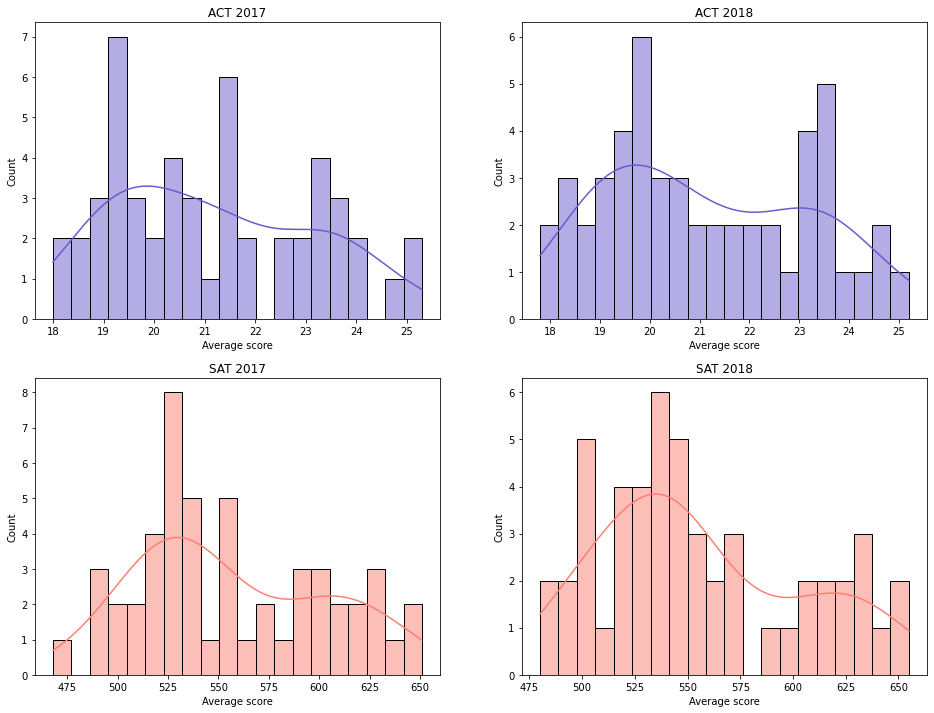

In [58]:
subplot_histograms(
    df_final,
    ['math_act17', 'math_act18', 'math_sat17', 'math_sat18'],
    ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018'],
    ['Average score', 'Average score', 'Average score', 'Average score'])

print('Math scores')

Plots resemble a bimodal distribution where there are double peaks.

Reading/verbal scores


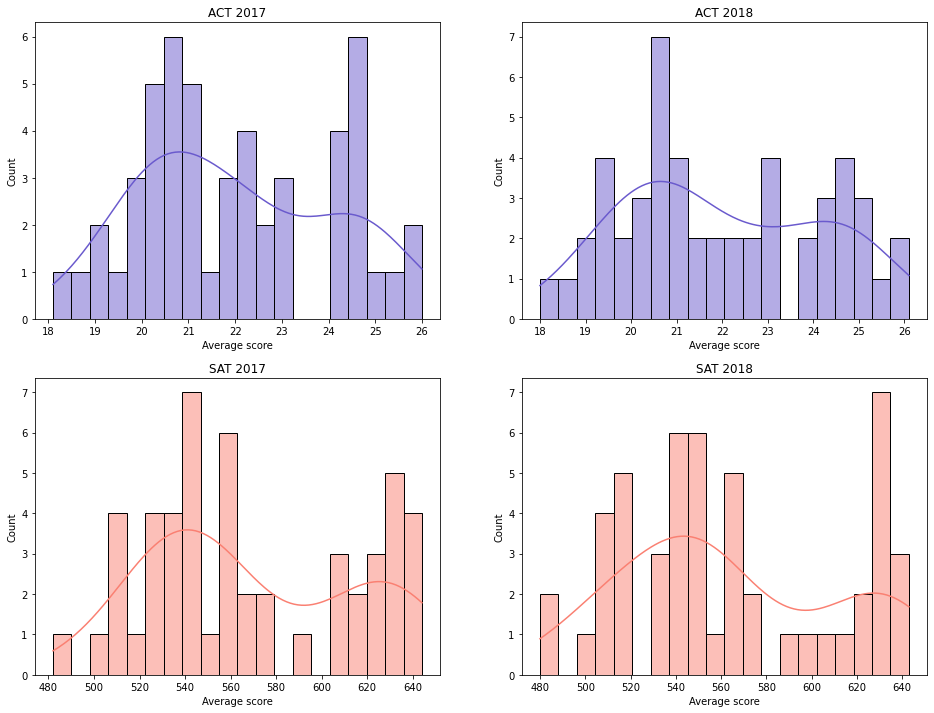

In [59]:
# Reading/verbal scores for SAT & ACT

subplot_histograms(
    df_final,
    ['reading_act17', 'reading_act18', 'readwrite_sat17', 'readwrite_sat18'],
    ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018'],
    ['Average score', 'Average score', 'Average score', 'Average score'])

print("Reading/verbal scores")

Plots resemble a bimodal distribution where there are double peaks.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [60]:
sns.set_style("darkgrid")

SAT vs. ACT math scores for 2017


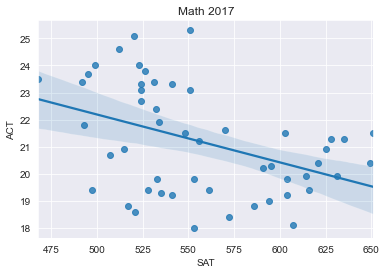

In [61]:
sns.regplot(data=df_final, x="math_sat17", y="math_act17")
plt.title('Math 2017')
plt.xlabel('SAT')
plt.ylabel('ACT')
print("SAT vs. ACT math scores for 2017")

We see a negative relationship between for Math scores in 2017.

SAT vs. ACT verbal/reading scores for 2017


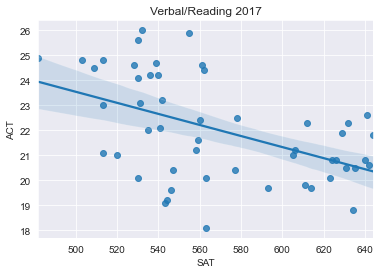

In [62]:
sns.regplot(data=df_final, x="readwrite_sat17", y="reading_act17")
plt.title('Verbal/Reading 2017')
plt.xlabel('SAT')
plt.ylabel('ACT')

print("SAT vs. ACT verbal/reading scores for 2017")

We see a negative relationship between for Verbal/Reading scores in 2017.

SAT vs. ACT total/composite scores for 2017


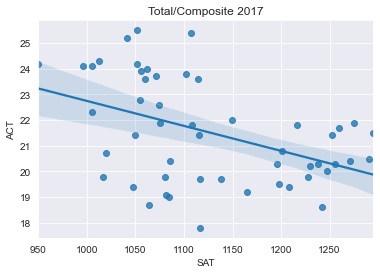

In [63]:
sns.regplot(data=df_final, x="total_sat17", y="composite_act17")
plt.title('Total/Composite 2017')
plt.xlabel('SAT')
plt.ylabel('ACT')

print("SAT vs. ACT total/composite scores for 2017")

We see a negative relationship between for total/composite scores in 2017.

Total scores for SAT 2017 vs. 2018


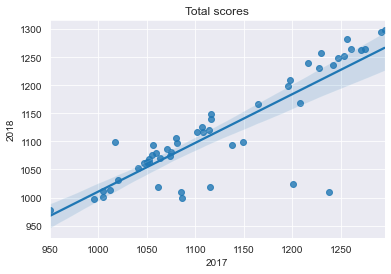

In [64]:
sns.regplot(data=df_final, x="total_sat17", y="total_sat18")
plt.title('Total scores')
plt.xlabel('2017')
plt.ylabel('2018')

print('Total scores for SAT 2017 vs. 2018')

Markers that's above the line will indicate better performing states, vice versa for those under the line.

Composite scores for ACT 2017 vs. 2018


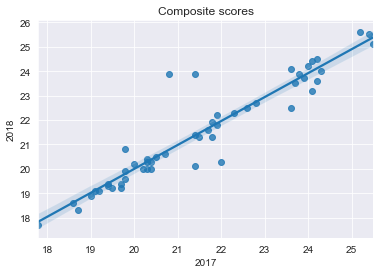

In [65]:
sns.regplot(data=df_final, x="composite_act17", y="composite_act18")
plt.title('Composite scores')
plt.xlabel('2017')
plt.ylabel('2018')

print('Composite scores for ACT 2017 vs. 2018')

Markers that's above the line will indicate better performing states, vice versa for those under the line.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [66]:
df_final.columns

Index(['state', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17',
       'participation_sat17', 'readwrite_sat17', 'math_sat17', 'total_sat17',
       'participation_act18', 'composite_act18', 'english_act18', 'math_act18',
       'reading_act18', 'science_act18', 'participation_sat18',
       'readwrite_sat18', 'math_sat18', 'total_sat18', 'ACT_diff', 'SAT_diff',
       'sum_diff'],
      dtype='object')

In [67]:
def subplot_boxplots(dataframe, list_of_columns):
    plt.figure(figsize=(12,5))
    sns.boxplot(data=dataframe[list_of_columns], orient='h')

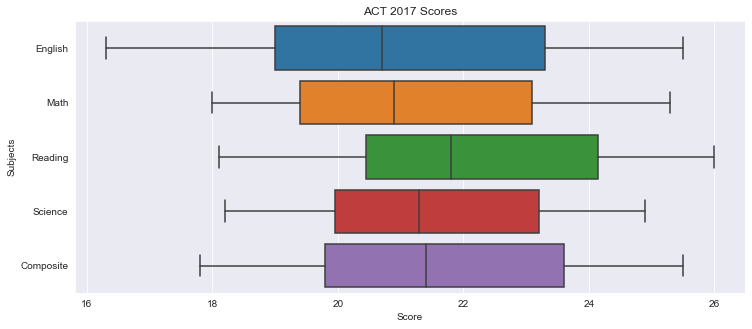

In [68]:
subplot_boxplots(df_final, ['english_act17','math_act17','reading_act17', 'science_act17', 'composite_act17'])
plt.title("ACT 2017 Scores")
plt.xlabel("Score")
plt.ylabel("Subjects")
plt.yticks([0, 1, 2, 3, 4], ['English', 'Math', 'Reading', 'Science', 'Composite']);

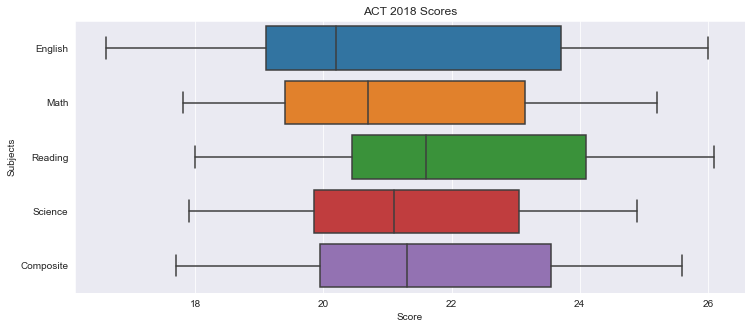

In [69]:
subplot_boxplots(df_final, ['english_act18', 'math_act18', 'reading_act18', 'science_act18', 'composite_act18'])
plt.title("ACT 2018 Scores")
plt.xlabel("Score")
plt.ylabel("Subjects")
plt.yticks([0, 1, 2, 3, 4], ['English', 'Math', 'Reading', 'Science', 'Composite']);

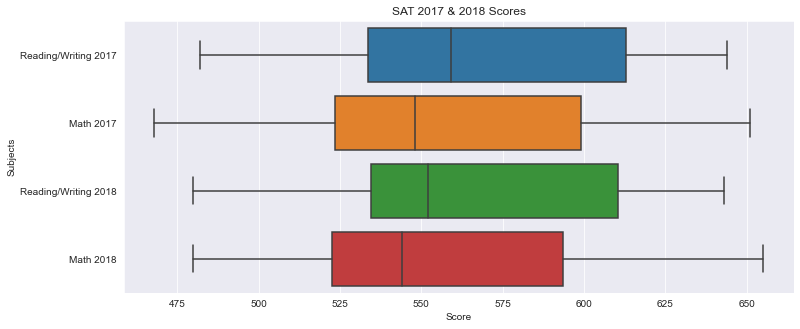

In [70]:
subplot_boxplots(df_final, ['readwrite_sat17', 'math_sat17', 'readwrite_sat18', 'math_sat18'])
plt.title("SAT 2017 & 2018 Scores")
plt.xlabel("Score")
plt.ylabel("Subjects")
plt.yticks([0, 1, 2, 3], ['Reading/Writing 2017', 'Math 2017', 'Reading/Writing 2018', 'Math 2018']);

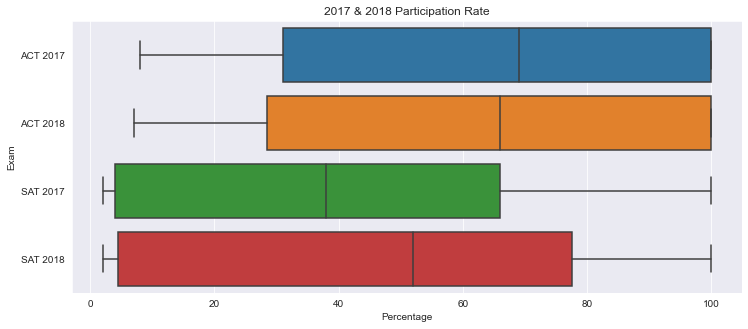

In [71]:
subplot_boxplots(df_final, ['participation_act17', 'participation_act18', 'participation_sat17', 'participation_sat18'])
plt.title("2017 & 2018 Participation Rate")
plt.xlabel("Percentage")
plt.ylabel("Exam");
plt.yticks([0, 1, 2, 3], ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018']);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [72]:
# Colorado
# Connecticut
# Delaware
# Illinois
# Michigan
# New Hampshire
# Rhode Island
# West Virginia

SATlist = [
'Colorado',
'Connecticut',
'Delaware',
'District of Columbia',
'Illinois',
'Maine',
'Michigan',
'New Hampshire']

In [73]:
SATfree = [
'Colorado',
'Connecticut',
'Delaware',
'Illinois',
'Ohio',
'Oklahoma',
'Michigan',
'New Hampshire'
]

In [74]:
df_final[['state', 'participation_sat17', 'participation_sat18']][df_final['state'].isin(SATlist)]

,state,participation_sat17,participation_sat18
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
13,Illinois,9.0,99.0
19,Maine,95.0,99.0
22,Michigan,100.0,100.0
29,New Hampshire,96.0,96.0


In [75]:
df_final[['state', 'participation_sat17', 'participation_sat18']][df_final['state'].isin(SATfree)]

,state,participation_sat17,participation_sat18
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
13,Illinois,9.0,99.0
22,Michigan,100.0,100.0
29,New Hampshire,96.0,96.0
35,Ohio,12.0,18.0
36,Oklahoma,7.0,8.0


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

2017 SAT Participation Map![](../images/tableau1_sat17.png)

2017 ACT Participation Map![](../images/tableau1_act17.png)

2018 SAT Participation Map![](../images/tableau1_sat18.png)

2018 ACT Participation Map![](../images/tableau1_act18.png)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answer:  
    
Symmetric distributions: mean = median  
Negative skewed: mean < median  
Positive skewed: mean > median  
  
###### ACT Participation (2017 & 2018)  
Negatively skewed, meaning that participation is high.  
2017: Mean = 0.66, Median = 0.71  
2018: Mean = 0.62, Median = 0.66  
  
###### SAT Participation (2017)  
Positively skewed, meaning that participation is low.  
Mean = 0.39, Median = 0.34  
  
###### SAT Participation (2018)  
Negatively skewed, meaning that participation is high.  
Mean = 0.62, Median = 0.66  
  
###### ACT Math (2017 & 2018)  
Positively skewed  
2017: Mean = 21.1 Median = 20.9  
2018: Mean = 21.1 Median = 20.65  

###### ACT Science (2017 & 2018)  
Positively skewed  
2017: Mean = 21.4, Median = 21.3  
2018: Mean = 21.3, Median = 20.95  
  
###### ACT English (2017 & 2018)  
Positively skewed  
2017: Mean = 20.8, Median = 20.55  
2018: Mean = 20.96, Median = 20.05  
  
###### ACT Reading (2017 & 2018)  
Positively skewed  
2017: Mean = 21.97, Median = 21.7  
2018: Mean = 21.99, Median = 21.45  
  
###### SAT Reading/Writing (2017 & 2018)  
Positively skewed 
2017: Mean = 569, Median = 559.5  
2018: Mean = 564, Median = 552  
  
###### SAT Math (2017 & 2018)  
Positively skewed 
2017: Mean = 557, Median = 549  
2018: Mean = 556, Median = 545  

In [76]:
def subplot_displots(dataframe, list_of_columns):
    for column in list_of_columns:
        if column != 'state':
            sns.displot(dataframe[column],bins =20, color='salmon', kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


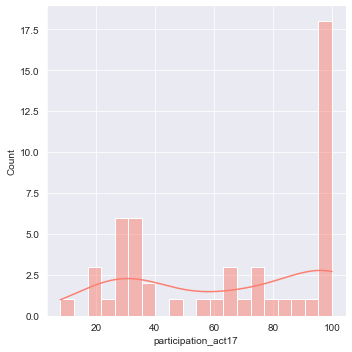

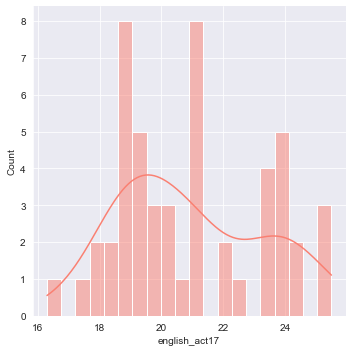

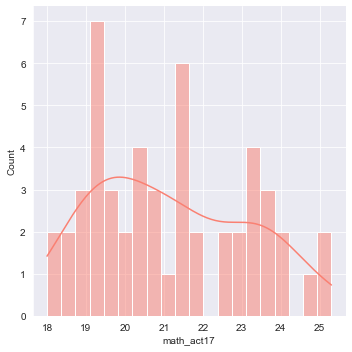

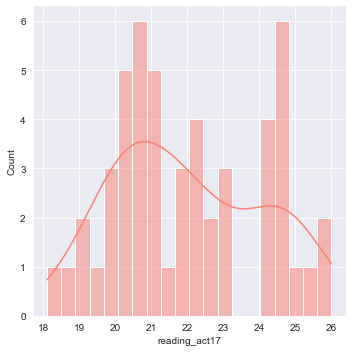

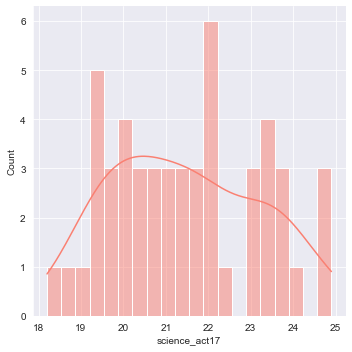

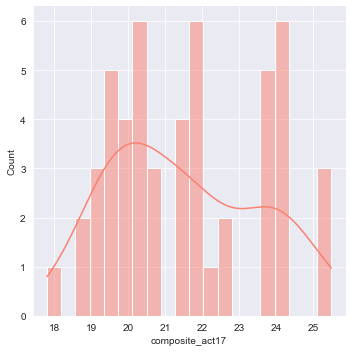

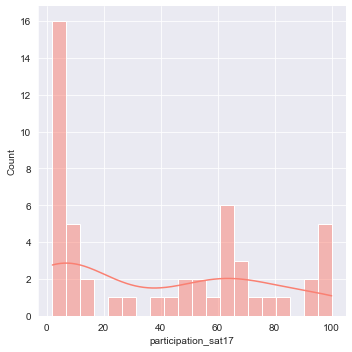

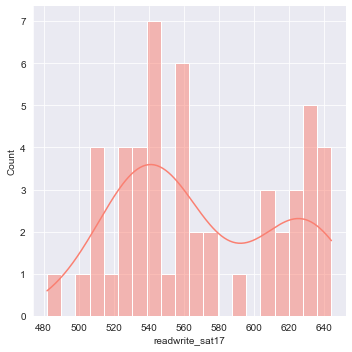

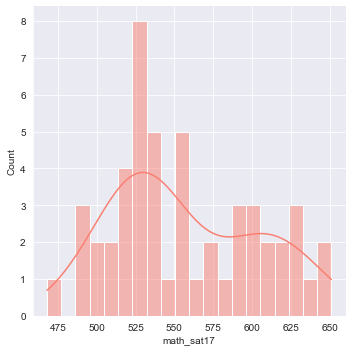

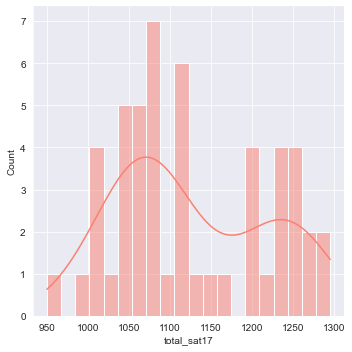

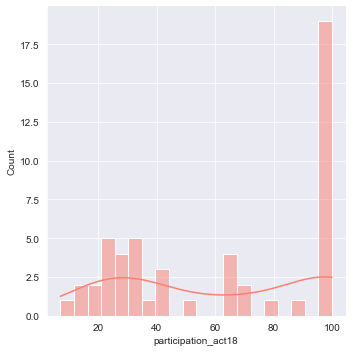

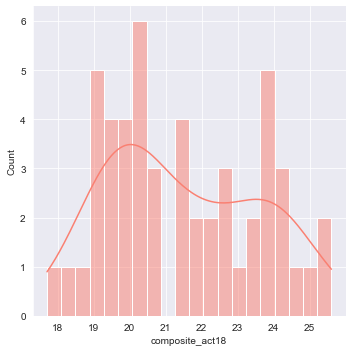

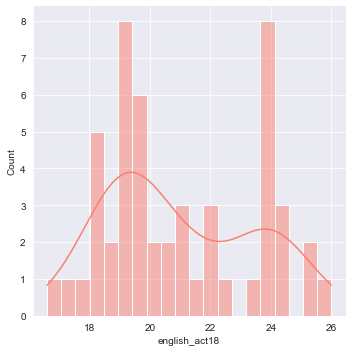

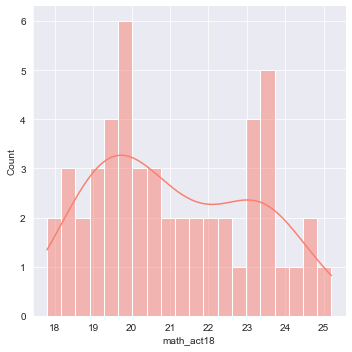

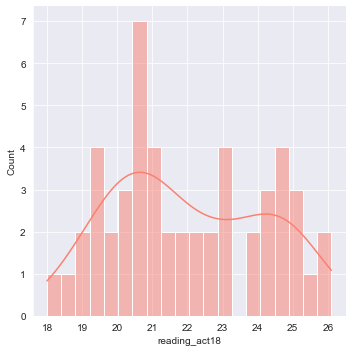

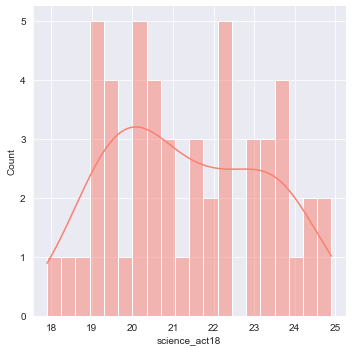

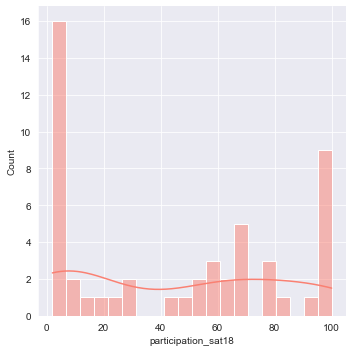

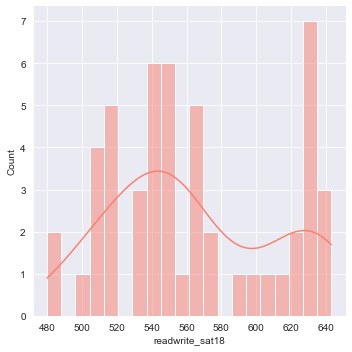

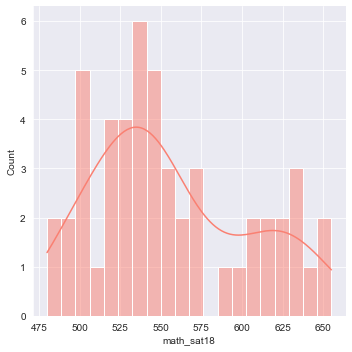

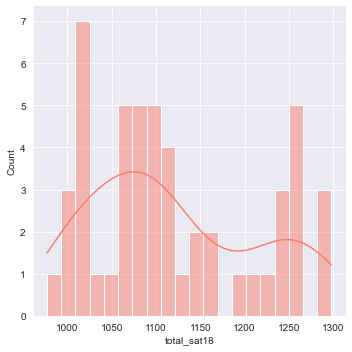

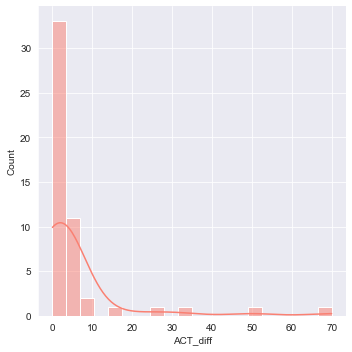

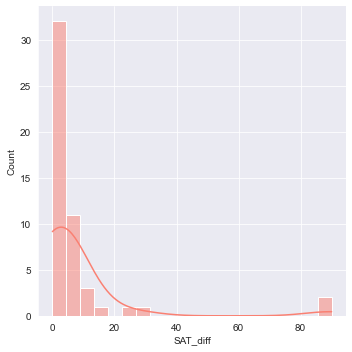

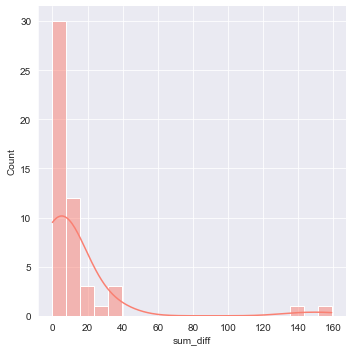

In [77]:
subplot_displots(df_final, df_final.columns)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No. The assumption is false. It should be the accumulation of sample means will tend towards a normal distribution and not the observations.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No. Though the shape resembles a normal distribution, we can see that double peaks appear in some of the distributions. Assuming a normal distribution will provide an inaccurate distribution of scores.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: This will depend to what exact relationship we're looking for. If we're looking to go to moe granular understanding (i.e. school level, town level), then we require more granular data in order to conduct statistical inference.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, scores are measured in different weightages.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [78]:
# Code:

from scipy import stats

stats.ttest_ind(df_final['participation_act17'], df_final['participation_sat17'], equal_var=False)

#Pvalue = 0.0001, so we reject null hypothesis that mean_ACT = mean_SCT at alpha 0.05.

Ttest_indResult(statistic=3.808577890817054, pvalue=0.00024238408285306908)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### Colorado and Illinois
Per **Finding 3** above, Colorado and Illinois had massive drops in participation rates for ACT and big increments in SAT from 2017 to 2018.

Based on [here](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/) and [here](https://reports.collegeboard.org/archive/sat-suite-program-results/2017/class-2017-results), College Board entered into new deals with both states to change examination into SAT from ACT. Additionally, per [here](https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/), both states do not charge registration fees for taking the SAT. These reasons explain the drastic swing in participation rates from 2017 to 2018.

Sources:  
https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/
https://reports.collegeboard.org/archive/sat-suite-program-results/2017/class-2017-results  
https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/

In [79]:
# This code is to determine the total change in participation rates across both SAT and ACT

df_final["ACT_diff"] = abs(df_final['participation_act17'] - df_final['participation_act18'])
df_final["SAT_diff"] = abs(df_final['participation_sat17'] - df_final['participation_sat18'])
df_final["sum_diff"] = df_final["ACT_diff"] + df_final["SAT_diff"]
df_final[['state', 'sum_diff']].sort_values(by='sum_diff', ascending=False).head()

,state,sum_diff
5,Colorado,159.0
13,Illinois,140.0
1,Alaska,37.0
9,Florida,34.0
39,Rhode Island,32.0


In [80]:
#to do - plot out below
col_illi_data = [['Colorado', 100, 11, 2017], ['Illinois', 93, 9, 2017], ['Colorado', 30, 100, 2018], ['Illinois', 43, 99, 2018]]
col_illi_df = pd.DataFrame(col_illi_data, columns=['state', 'ACT', 'SAT', 'Year'])

In [81]:
col_illi_df

,state,ACT,SAT,Year
0,Colorado,100,11,2017
1,Illinois,93,9,2017
2,Colorado,30,100,2018
3,Illinois,43,99,2018


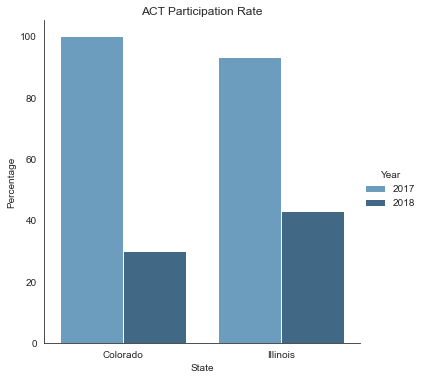

In [82]:
sns.set_style('white')
sns.plotting_context("notebook")
sns.catplot(data=col_illi_df, x='state', y='ACT', hue='Year', kind='bar', palette="Blues_d")
plt.xlabel('State')
plt.ylabel('Percentage')
plt.title("ACT Participation Rate")
plt.savefig('temp.png', transparent=True)

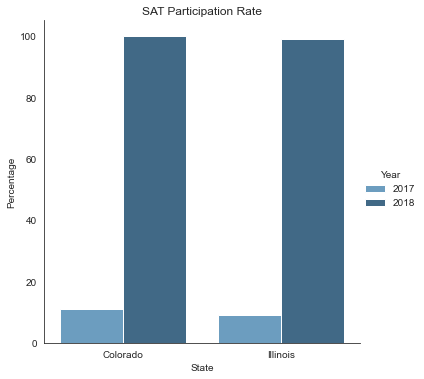

In [83]:
sns.plotting_context("notebook")
sns.catplot(data=col_illi_df, x='state', y='SAT', hue='Year', kind='bar', palette="Blues_d")
plt.xlabel('State')
plt.ylabel('Percentage')
plt.title("SAT Participation Rate")

plt.savefig('temp1.png', transparent=True)

### Florida
Florida was the state with the highest participation rate across the 2 exams. Per [here](https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act), it states that Florida students must pass exit exams or achieve specified scores on either papers, which explains the high participation rates.  
  
Source:  
https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act


In [84]:
df_final[['state', 'participation_sat17', 'participation_act17']] \
[(df_final['participation_sat17'] > 50) & (df_final['participation_act17'] > 50)].head(1)

,state,participation_sat17,participation_act17
9,Florida,83.0,73.0


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Iowa

Leveraging a success story from Colorado/Illinois as depicted above, I recommend College Board to explore striking contract deals with Iowa Education Board to enforce SAT tests for all juniors. Tests should also ideally be free perhaps for students from public schools. 

Supporting reasons:  

1. Iowa currently does not enforce SAT nor ACT tests for students
2. Iowa currently only have a 2-3% participation rate for SAT currently
  
Additional data that would be helpful could include:
  
1. Household income
2. Population breakdown by age
3. Iowa universities admissions data


In [85]:
df_final[['state', 'participation_sat17', 'participation_sat18', 'participation_act17', 'participation_act18']].sort_values(by='participation_sat17').head()

,state,participation_sat17,participation_sat18,participation_act17,participation_act18
34,North Dakota,2.0,2.0,98.0,98.0
24,Mississippi,2.0,3.0,100.0,100.0
15,Iowa,2.0,3.0,67.0,68.0
25,Missouri,3.0,4.0,100.0,100.0
44,Utah,3.0,4.0,100.0,100.0
